In [1]:
library(tidyverse)
employees <- read_csv("_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)
carbs <- read.csv("_build/data/carbs.csv")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Two-Sample Hypothesis Testing

Although analyzing one sample of data is useful for problems like gauging public opinion or testing the stability of a manufacturing process, there are more advanced analyses which involve comparing the responses of two or more groups. This can be in the form of comparing means or comparing proportions.

## Testing Means

Many business applications involve a comparison of two population means. For instance, a company may want to know if a new logo produces more sales than the previous logo, or a consumer group may want to test whether two major brands of food freezers differ in the average amount of electricity they use. In this section we extend our knowledge of hypothesis testing on one population mean to comparing two population means.

To use these tests you need to have a sample from each of the two populations of interest. For the tests to be valid, the samples must be randomly selected. They can be either independent or dependent. This is an important distinction, because it determines which statistical method is used and how one controls for sources of variation. **Independent samples** are selected from each population separately. If we selected a random sample of customers of one domestic gas supplier and a random sample of customers from a rival gas supplier, the samples would be independent. **Dependent samples** consist of matched or paired values that are inherently related to each other. If we selected a sample of athletes and compared their pulse rates before and after an exercise routine, the samples would be paired, or dependent, because we drew the two samples of observations from the same set of athletes. This allows us to control for the variability between athletes and focus on the pulse rate difference in each individual due to the control condition (*i.e.*, the exercise routine). The choice of independent or dependent samples depends on the context of the test. 

### Independent Samples

The independent samples t-test is used to compare the means of two independent samples. It can be used to test whether:

+ Biology graduates have a different average annual income than chemistry graduates.
+ Length of life, on average, is shorter for never-married persons than for people who are or have been married.
+ The mean years of schooling of Republicans is different than the mean years of schooling of Democrats. 
+ Men average more hours of sleep per night than women.
+ The PE (price to earnings) ratio for tech stocks is on average higher than for financial services stocks.

When performing two sample tests of means, the null hypothesis is always that the population means of the two groups are the same. Formally, if we denote $\mu_1$ the population mean of group 1 and $\mu_2$ the population mean of group 2, our null hypothesis is $H_o:\mu_1=\mu_2$. There are three possible alternative hypotheses one can test, as listed below:

| Alternative Hypothesis | Terminology |
| :-: | :-: |
| $H_{a} :\mu_{1} -\mu_{2}$ < 0 | Left-sided |
| $H_{a} :\mu_{1} -\mu_{2}$ > 0 | Right-sided | 
| $H_{a} :\mu_{1} -\mu_{2} \ne$ 0 | Two-sided | 

As an example, the General Social Survey (GSS, link [here](http://gss.norc.org/)) has been tracking American attitudes on a wide variety of topics. With the exception of the U.S. Census, the GSS is the most frequently used source of information about American society. The surveys are now conducted every other year and measure hundreds of variables on thousands of observations. We have this data loaded into a data frame called `gss`:

In [2]:
gss <- read.csv("_build/data/gss_data.csv")
head(gss[,c("ID", "WRKGOVT", "HRS", "INCOME", "CUREMPYR")])

ID,WRKGOVT,HRS,INCOME,CUREMPYR
1,2,NA,NA,NA
2,2,40,82500,3
3,2,35,45000,10
4,1,NA,16250,NA
5,2,43,32500,3
6,2,NA,NA,NA


These variables are defined as follows:

+ `ID`: The unique ID of each observation
+ `WRKGOVT`: 1 = Government, 2 = Private
+ `HRS`: Hours worked per week
+ `INCOME`: Yearly income from primary job
+ `CUREMPYR`: How many years the employee has been with their current employer

Suppose we want to test if people who work for the government earn more than those who have private-sector jobs. Because we are testing whether the mean in group 1 (government workers) is *greater* than the mean in group 2 (private-sector workers), our hypotheses are:

+ $H_{o}$: On average, government workers earn the same as those in the private sector.
  + $\mu_1 = \mu_2$
+ $H_{a}$: On average, government workers earn more than those in the private sector.
  + $\mu_1 > \mu_2$

Fortunately, we can use the same `t.test()` function that we saw in Section \@ref(testing-means) to conduct a two-sample test of means. For a two-sample test, the syntax is slightly different. Assuming our data is saved in a data frame called `df`:

```{admonition} Syntax
`t.test(df$var ~ df$group, alternative = "two.sided")`
+ *Required arguments*
  - `df$var`: The variable of interest (*i.e.*, the variable we are comparing across the two samples).
  - `df$group`: The sample membership of each observation (*i.e.*, whether each observation belongs to sample one or sample two).
+ *Optional arguments*
  - `alternative`: Whether one wants to conduct a two-sided, right-sided, or left-sided test. Under a right-sided test the alternative hypothesis states that the true population parameter of the second group is *greater than* the true population parameter of the first group, so `alternative` should equal `"greater"` for a right-sided test. Following the same logic, `alternative` should equal `"less"` for a left-sided test.
```

Applying this to the `gss` data:

In [3]:
t.test(gss$INCOME ~ gss$WRKGOVT, alt = "greater")


	Welch Two Sample t-test

data:  gss$INCOME by gss$WRKGOVT
t = 1.497, df = 343.21, p-value = 0.06765
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -383.9179       Inf
sample estimates:
mean in group 1 mean in group 2 
       44621.83        40847.81 


From this output, we find the average yearly income for government workers (group 1) is \$44,621 and for private sector workers (group 2) is \$40,847. In the sample, government workers do indeed make more on average than private sector workers. However, using a strict threshold of $\alpha =$ 0.05, the test's p-value of 0.06765 is too large, so we would **fail to reject the null hypothesis** of equal means and conclude that there is insufficient evidence that this inequality is true in the population. The p-value is relatively low though, so some further analysis could be warranted to investigate this hypothesis (looking for and understanding outliers, taking  a slightly larger sample, etc.)

For another example, imagine we wanted to test whether there is sufficient evidence to conclude that people who currently work for the government (group 1) have been with their employer shorter or longer on average than those currently working in the private sector (group 2). Our hypotheses for this test would be:

+ $H_{o}$: $\mu_1 = \mu_2$
+ $H_{a}$: $\mu_1 \ne \mu_2$

Because we are conducting a two-sided test, we can omit the `alt` parameter in our call to `t.test()`.

In [4]:
t.test(gss$CUREMPYR ~ gss$WRKGOVT)


	Welch Two Sample t-test

data:  gss$CUREMPYR by gss$WRKGOVT
t = 3.738, df = 187.54, p-value = 0.0002462
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.517532 4.909142
sample estimates:
mean in group 1 mean in group 2 
      11.111888        7.898551 


Note that we see a difference in the means of the two samples, 11.1 years for government employees versus 7.9 for private sector employees. In this case, the small p-value for this test, 0.0002462, indicates that there is strong evidence to reject the null hypothesis of equal means. We may conclude that in 2008, it is very likely that on average, government employees had stayed at their current jobs for a different length of time than private sector employees.

### Dependent Samples

Often we have two groups of data that are not independent but rather paired. The simplest example of paired data is a before-after test, in which each subject is measured twice, resulting in pairs of observations of the same subject. For example, we have individuals who go through a 12-week strength training program and have the amount they can bench press before and after the training program. We can't analyze these data as two independent samples because we have two measurements (pairs of data) on the same individual. We need to adjust our hypothesis test to account for the fact that the measurements are correlated. 

To see what can go wrong if paired data are not analyzed correctly, consider the following example. A company researcher wants to test a new formula for a sports drink that has been designed to improve running performance. Instead of the regular "carbohydrate-only" drink that the company currently produces, this new sports drink contains a "carbohydrate-protein" formula. The researcher would like to know whether this new carbohydrate-protein sports drink leads to a difference in running performance compared to the carbohydrate-only sports drink.

To carry out the experiment, the researcher recruited 20 middle distance runners. All of these participants performed two trials in which they had to run as far as possible for 2 hours on a treadmill. In one of the trials, each of the 20 participants drank a bottle of the carbohydrate-only formula. In the other trial, each of the same 20 participants drank a bottle of the carbohydrate-protein formula. At the end of the two trials, the distance each participant ran (in km) was recorded. The data (which is stored in a data frame called `carbs`) is shown in the table below. Do the data present sufficient evidence to indicate that the new formula is better?

<table>
 <thead>
  <tr>
   <th style="text-align:center;"> carb_only </th>
   <th style="text-align:center;"> carb_protein </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> 10.58 </td>
   <td style="text-align:center;"> 10.53 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.89 </td>
   <td style="text-align:center;"> 11.16 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.17 </td>
   <td style="text-align:center;"> 10.31 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.61 </td>
   <td style="text-align:center;"> 11.79 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.79 </td>
   <td style="text-align:center;"> 11.88 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 9.72 </td>
   <td style="text-align:center;"> 9.81 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.80 </td>
   <td style="text-align:center;"> 10.98 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.80 </td>
   <td style="text-align:center;"> 12.01 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.58 </td>
   <td style="text-align:center;"> 10.76 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.98 </td>
   <td style="text-align:center;"> 11.12 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.66 </td>
   <td style="text-align:center;"> 11.70 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 12.38 </td>
   <td style="text-align:center;"> 12.40 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.08 </td>
   <td style="text-align:center;"> 10.21 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 10.76 </td>
   <td style="text-align:center;"> 11.07 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.07 </td>
   <td style="text-align:center;"> 11.35 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.75 </td>
   <td style="text-align:center;"> 11.77 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.25 </td>
   <td style="text-align:center;"> 11.39 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 12.15 </td>
   <td style="text-align:center;"> 12.24 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.43 </td>
   <td style="text-align:center;"> 11.52 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 11.93 </td>
   <td style="text-align:center;"> 12.11 </td>
  </tr>
</tbody>
</table>

At first glance this appears to be a two-sample comparison of means, where we are interested in whether the carbohydrate-protein average distance ($\mu_{2}$) is greater than the carbohydrate-only average distance ($\mu_{1}$). Therefore, our hypotheses are:

+ $H_{o}$: The carbohydrate-protein formula does *not* result in different performance than the carbohydrate-only formula.
  + $\mu_{1} = \mu_{2}$
+ $H_{a}$: The carbohydrate-protein formula results in improved performance over the carbohydrate-only formula.
  + $\mu_{1} < \mu_{2}$

Let's try using the standard two sample t-test. Because our **alt**ernative hypothesis states that the carb-only mean is *less than* the carb-protein mean, we set `alt` equal to `"less"`.

In [5]:
t.test(carbs$carb_only, carbs$carb_protein, alt = "less")


	Welch Two Sample t-test

data:  carbs$carb_only and carbs$carb_protein
t = -0.59809, df = 37.992, p-value = 0.2767
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.2482844
sample estimates:
mean of x mean of y 
  11.1690   11.3055 


Since the p-value is greater than 0.05, we fail to reject the null hypothesis and cannot conclude there is a difference in distance run after drinking each of the two drink types.

A second glance at the data reveals an inconsistency with this conclusion. We note that the distance measurement for the carb-only drink is larger than the corresponding value for the carb-protein drink for every observation except row #1. We can see this even more clearly in the visualization below, which shows the difference between the distances run by each runner after the carb-only and carb-protein drinks. The distance run after the carb-protein drink (plotted in green) is greater than the distance run after the carb-only drink (plotted in red) for nearly every runner.

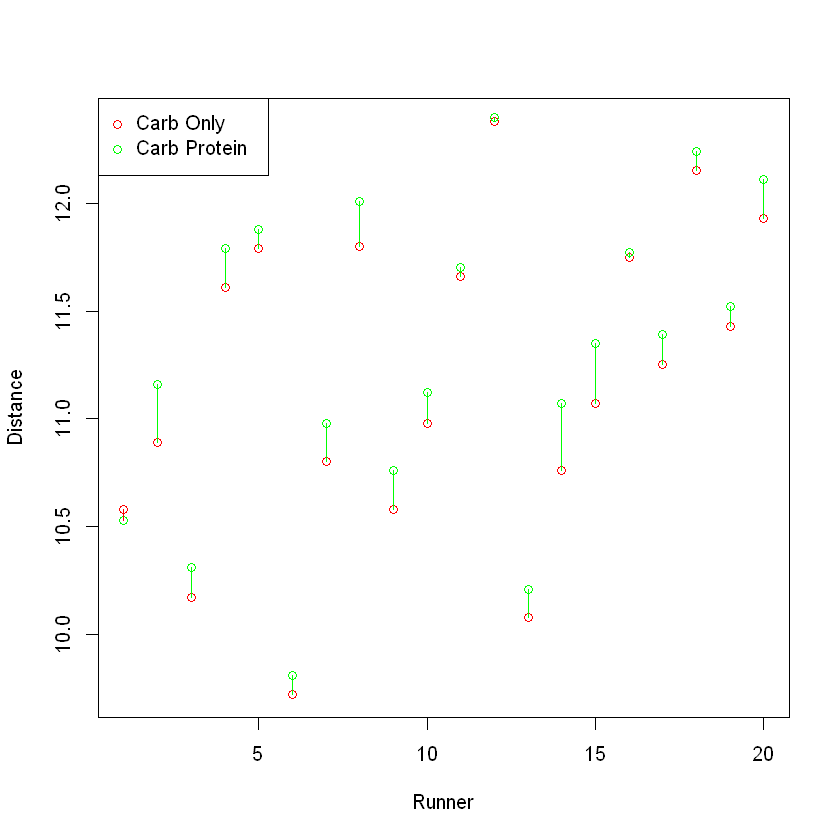

In [6]:
# In red, plot the distance run by each runner after the carb-only drink
plot(1:nrow(carbs), carbs$carb_only, col="red",
      xlab="Runner", ylab="Distance")
# In green, plot the distance run by each runner after the carb-protein drink      
points(1:nrow(carbs), carbs$carb_protein, col="green")
# Add a legend
legend("topleft", pch=c(1,1), col=c("red", "green"), legend=c("Carb Only", "Carb Protein"))
# Draw a line between the carb-only and carb-protein distance for each runner
for(i in 1:nrow(carbs)) {
  if (carbs$carb_protein[i]>carbs$carb_only[i]){
    lines(c(i,i),c(carbs$carb_only[i],carbs$carb_protein[i]),col="green")
  }
  if (carbs$carb_protein[i]<=carbs$carb_only[i]){
    lines(c(i,i),c(carbs$carb_only[i],carbs$carb_protein[i]),col="red")
  }
}

The evidence seems to imply that the carb-protein drink resulted in greater distances than the carb-only drink. Why did the two-sample t-test conclude that there was not a difference between the two drinks?

The two-sample t-test described earlier requires that the two samples be independent and random, and thus is not the right statistical test procedure for this example. Certainly, the independence requirement was violated by the manner in which the experiment was conducted. Each pair of measurements, a carb-only distance and carb-protein distance, is associated with the same runner. A glance at the data will show that the distances are of approximately the same magnitude for a particular runner, but vary from one runner to another. This, of course, is exactly what we might expect. Distance run, in a large part, is determined by a runner's stamina and muscle mass. Since each runner had a different physical ability, we might expect a large amount of variability in the distance run from one runner to another.

Since we are interested in performance variability due to the drink and not runner variability, we must conduct a **paired difference test**. This test eliminates the effect of the runner-to-runner variability and yields more information on the mean difference in the distances run for the two drink types.

Luckily, a paired t-test is easy to run. All we need to do is add a `paired` argument to the `t.test()` command as follows:

In [7]:
t.test(carbs$carb_only, carbs$carb_protein, alt = "less", paired = TRUE)


	Paired t-test

data:  carbs$carb_only and carbs$carb_protein
t = -6.6221, df = 19, p-value = 1.229e-06
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -0.100858
sample estimates:
mean of the differences 
                -0.1365 


Once we account for the fact that the measurements are paired, we find a vastly different p-value and can now reject the null hypothesis of equal means. We conclude that it is likely that, on average, runners drinking the carb-protein mixture would run farther than those who drank the carb-only drink.

## Testing Proportions

Besides comparing two population means, one might be interested in comparing two population proportions. For example, a political candidate might want to estimate the difference in the proportions of voters in two districts who favor her candidacy.

In this section we look at how to do hypothesis testing on proportions from two independent samples. Similar in spirit to the method for comparing two means, we have two population proportions which we denote $p_1$ and $p_2$. The null hypothesis is that $H_0:p_1=p_2$. As with tests of population means, there are three alternative hypotheses:

| Alternative Hypothesis | Terminology |
| :-: | :-: |
| $H_{a} :p_{1} < p_{2}$ | Left-tailed |
| $H_{a} :p_{1} > p_{2}$ | Right-tailed | 
| $H_{a} :p_{1} \ne p_{2}$ | Two-tailed |

As an example, suppose that Professor Yael and Professor Michael were both given a section of entering MBA students for a statistics boot camp before fall classes started. After the boot camp ended, a survey was given to all the participants. Of the 75 who had Yael as an instructor, 45 said they were satisfied, whereas 48 of the 90 who had Michael were satisfied. Is there a significant difference in the percentage of students who were satisfied between the two instructors? To test this, our null and alternative hypotheses would be: 

+ $H_o$: There is no difference in the proportion of satisfied students in Michael and Yael's classes.
  + $p_1 = p_2$
+ $H_a$: There is a difference in the proportion of satisfied students in Michael and Yael's classes.
  + $p_1 \ne p_2$

We can use `prop.test()` in R to calculate the appropriate p-value from this sample data:

```{admonition} Syntax
`prop.test(x = c(x1, x2), n = c(n1, n2), alternative = "two.sided")`
+ *Required arguments*
  - `x`: A vector with the number of “successes” in the two samples.
  - `n`: A vector with the sample sizes of the two samples.
+ *Optional arguments*
  - `alternative`: Whether one wants to conduct a two-sided, right-sided, or left-sided test. Under a right-sided test the alternative hypothesis states that the true population parameter is *greater than* the value specified in the null, so `alternative` should equal `"greater"` for a right-sided test. Following the same logic, `alternative` should equal `"less"` for a left-sided test.
```

In [8]:
prop.test(x = c(45, 48), n = c(75, 90))


	2-sample test for equality of proportions with continuity correction

data:  c(45, 48) out of c(75, 90)
X-squared = 0.49304, df = 1, p-value = 0.4826
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.09693574  0.23026908
sample estimates:
   prop 1    prop 2 
0.6000000 0.5333333 


Since the p-value is greater than 0.05, we fail to reject the null hypothesis and cannot conclude there is a difference between the proportion of satisfied students in the two classes.